# | **Finanical Consumer Compliments**

This study uses financial consumer complaints data to analyse the types of complaints, their distribution and trends over time. Through exploratory data analysis (EDA), important patterns and problematic areas in the data set are revealed and strategic recommendations are presented to increase consumer satisfaction.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec  
import seaborn as sns

sns.set_palette('coolwarm')
sns.set_theme(style='darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

---

In [2]:
df= pd.read_csv('C:\Jupter\DATASETS\Financial Consumer Complaints.csv')
df.head(3)

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2/24/18,Closed with explanation,Yes,NaN
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,8/12/15,Closed with explanation,Yes,No
2,1145261,12/5/14,Bank account or service,Checking account,Deposits and withdrawals,"""""",NaN,Cumulus Financial,CA,91792,NaN,NaN,Referral,12/8/14,Closed with explanation,Yes,No


In [3]:
df.info()
print(f'Number of duplicated row :{df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75513 entries, 0 to 75512
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Complaint ID                  75513 non-null  int64 
 1   Date Sumbited                 75513 non-null  object
 2   Product                       75513 non-null  object
 3   Sub-product                   75513 non-null  object
 4   Issue                         75513 non-null  object
 5   Sub-issue                     74762 non-null  object
 6   Company public response       27335 non-null  object
 7   Company                       75513 non-null  object
 8   State                         72620 non-null  object
 9   ZIP code                      71146 non-null  object
 10  Tags                          8953 non-null   object
 11  Consumer consent provided?    23339 non-null  object
 12  Submitted via                 75513 non-null  object
 13  Date Received   

##  **Data Prepping** + 

In [4]:
# Type Converting
df['Date Sumbited'] = pd.to_datetime(df['Date Sumbited'], format='%m/%d/%y')
df['Date Received'] = pd.to_datetime(df['Date Received'], format='%m/%d/%y')

# Time Difference
df['Time_Diff'] = (df['Date Received'] - df['Date Sumbited']).dt.days

# Changing the column name
df.columns = [col.replace(' ', '-') for col in df.columns]
df.columns = [col.replace('?', '') for col in df.columns]
df['Sub-issue'] = df['Sub-issue'].replace('""', np.nan)
df['Sub-product'] = df['Sub-product'].replace('""', np.nan)
df['Year']  = df['Date-Sumbited'].dt.year


# Filling null values
df['Sub-issue'] = df['Sub-issue'].fillna('No-Sub')
df['Sub-product'] = df['Sub-product'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')
df['ZIP-code'] = df['ZIP-code'].fillna('No_Zip_Code')
df['Tags'] = df['Tags'].fillna('No_Tags')
df['Consumer-consent-provided'] = df['Consumer-consent-provided'].fillna('Unknown')
df['Consumer-disputed'] = df['Consumer-disputed'].fillna('Unknown')

df['State'] = df['State'].apply(lambda x: x if len(x) == 2 else 'Unknown')

# Dropping columns
df.drop(columns='Company', inplace=True, errors='ignore')  
df.drop(columns='Company-public-response', inplace=True, errors='ignore')  
df.drop(columns='Consumer-consent-provided', inplace=True, errors='ignore')  
df.drop(columns='Tags', inplace=True, errors='ignore')  
df.drop(columns='ZIP-code',inplace=True)


# Some Filtering
value_counts = df['Sub-product'].value_counts()
values_more_than_100 = value_counts[value_counts > 100].index
df = df[df['Sub-product'].isin(values_more_than_100)]

value_counts = df['Issue'].value_counts()
values_more_than_100 = value_counts[value_counts > 100].index
df = df[df['Issue'].isin(values_more_than_100)]

value_counts = df['Sub-issue'].value_counts()
values_more_than_100 = value_counts[value_counts > 100].index
df = df[df['Sub-issue'].isin(values_more_than_100)]

value_counts = df['Submitted-via'].value_counts()
values_more_than_100 = value_counts[value_counts > 100].index
df = df[df['Submitted-via'].isin(values_more_than_100)]

df = df[df['Time_Diff'] < 90]

df.reset_index(drop=True, inplace=True)


##  **Vizulation** + 
## **EDA**
---

### Product 

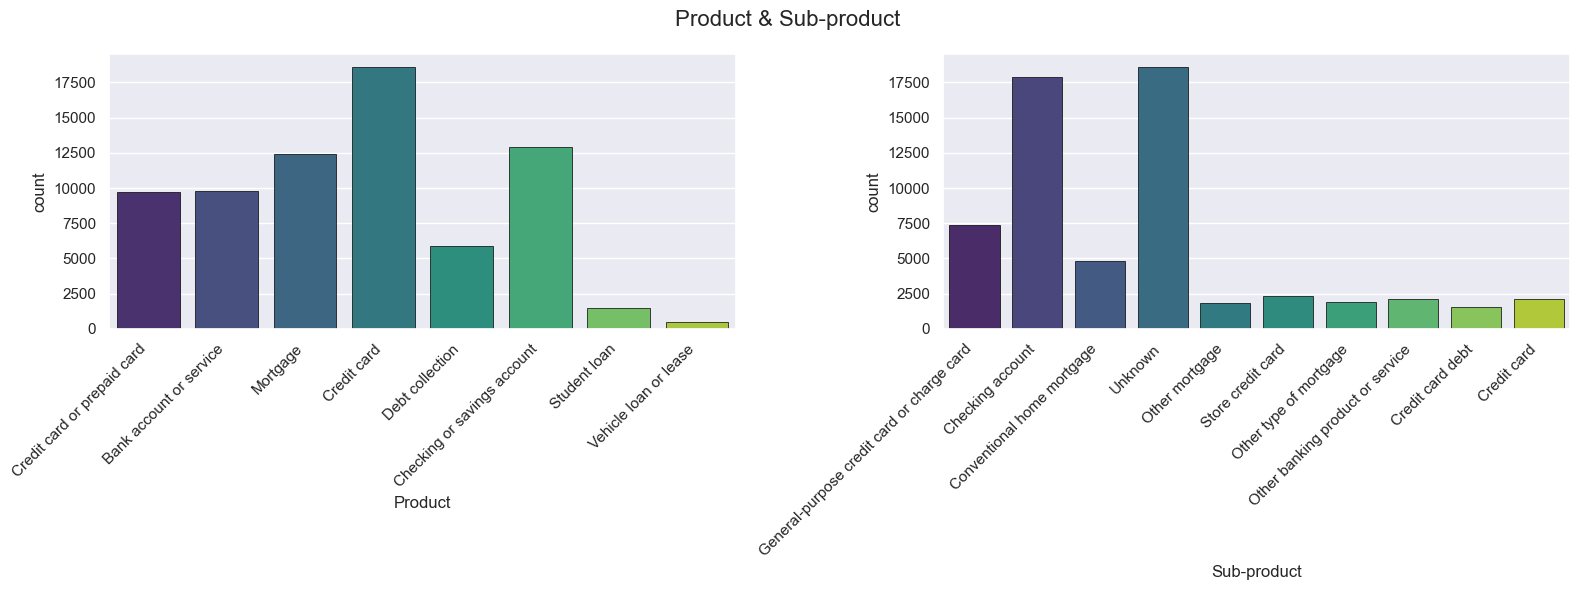

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

n_value = df['Product'].value_counts().iloc[:].index
sns.countplot(data=df[df['Product'].isin(n_value)], x='Product', palette='viridis', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

for patch in axes[0].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)


n_value_sub = df['Sub-product'].value_counts().iloc[:10].index
sns.countplot(data=df[df['Sub-product'].isin(n_value_sub)], x='Sub-product', palette='viridis', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

for patch in axes[1].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

plt.suptitle('Product & Sub-product', fontsize=16)
plt.tight_layout()
plt.show()


### Issue

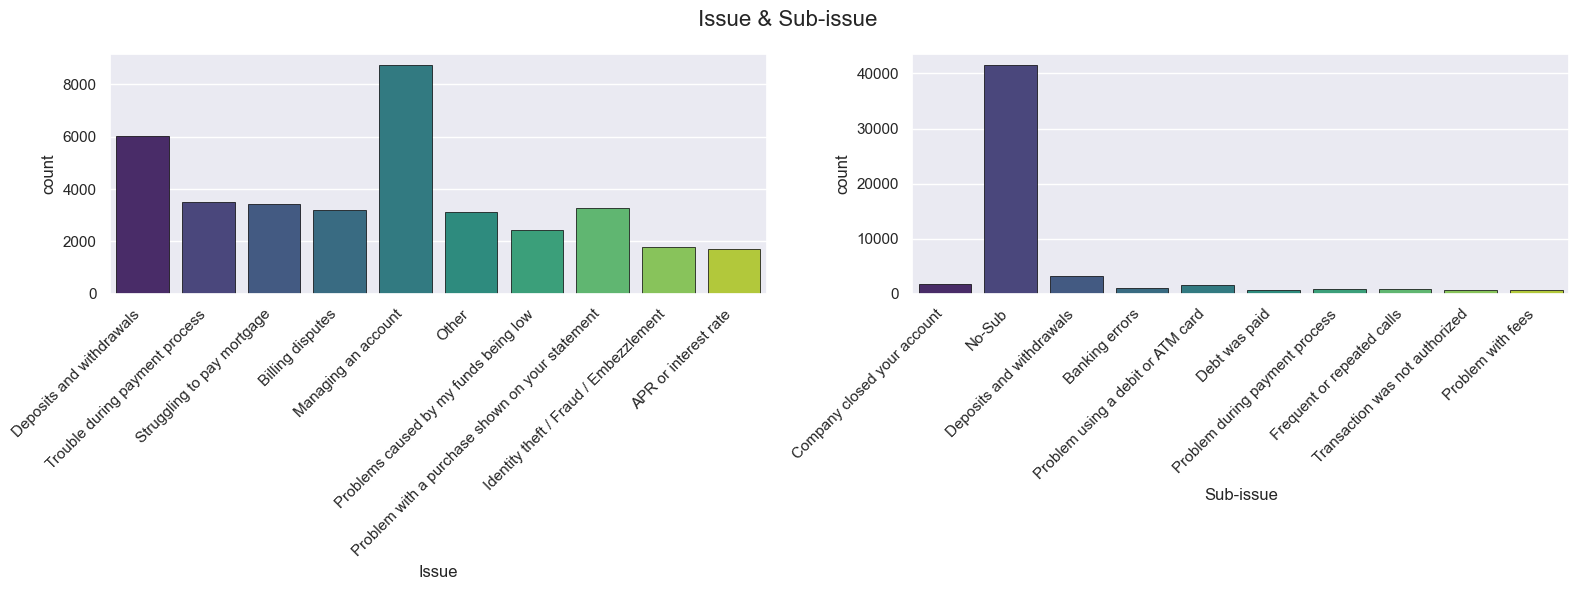

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

n_value = df['Issue'].value_counts().iloc[:10].index
sns.countplot(data=df[df['Issue'].isin(n_value)], x='Issue', palette='viridis', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

for patch in axes[0].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

n_value_sub = df['Sub-issue'].value_counts().index
n_value_sub = [issue for issue in n_value_sub if len(issue) <= 35][:10]
sns.countplot(data=df[df['Sub-issue'].isin(n_value_sub)], x='Sub-issue', palette='viridis', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

for patch in axes[1].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

plt.suptitle('Issue & Sub-issue', fontsize=16)
plt.tight_layout()
plt.show()


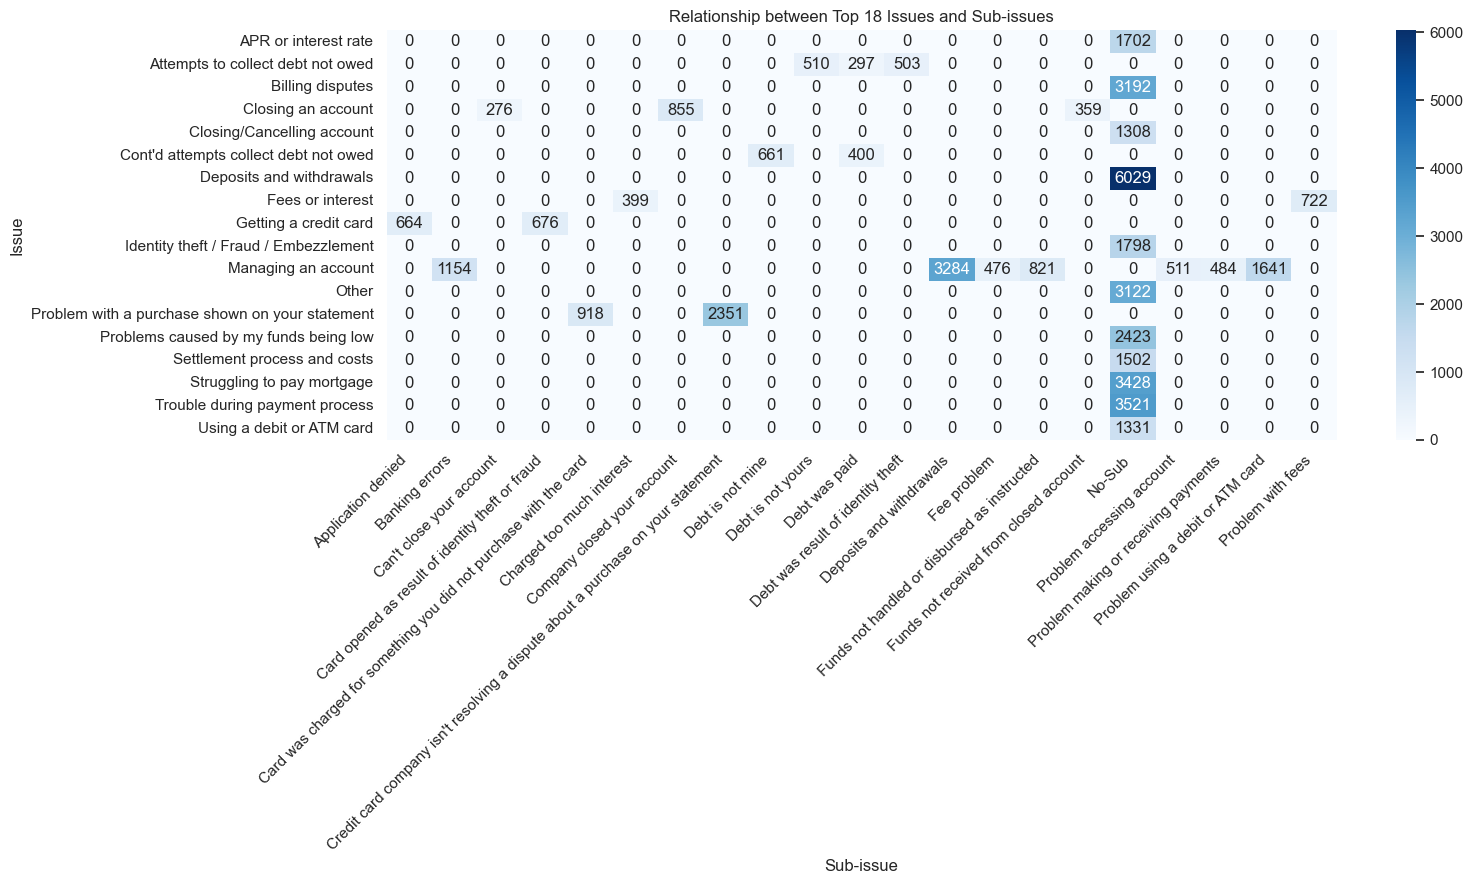

In [7]:
top_issues = df['Issue'].value_counts().nlargest(18).index
top_sub_issues = df['Sub-issue'].value_counts().nlargest(30).index

filtered_df = df[df['Issue'].isin(top_issues) & df['Sub-issue'].isin(top_sub_issues)]

pivot_table = pd.crosstab(filtered_df['Issue'], filtered_df['Sub-issue'])

plt.figure(figsize=(16, 9))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship between Top 18 Issues and Sub-issues')
plt.xlabel('Sub-issue')
plt.ylabel('Issue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Issue & Product  Distrubtion by State

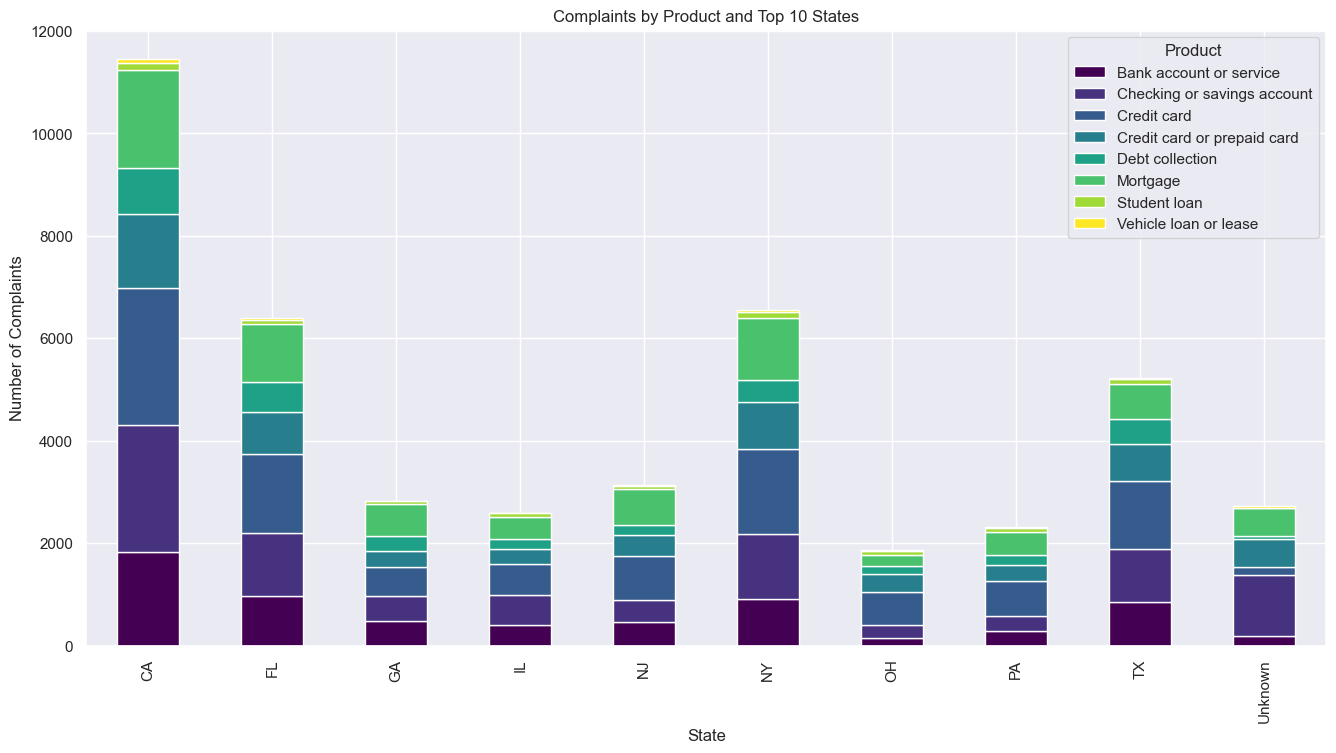

In [14]:
issue_counts = df.groupby(['State', 'Product']).size().reset_index(name='Complaint Count')

top_states = issue_counts.groupby('State')['Complaint Count'].sum().nlargest(10).index

filtered_issue_counts = issue_counts[issue_counts['State'].isin(top_states)]

pivot_df = filtered_issue_counts.pivot_table(index='State', columns='Product', values='Complaint Count', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Complaints by Product and Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.legend(title='Product')
plt.show()


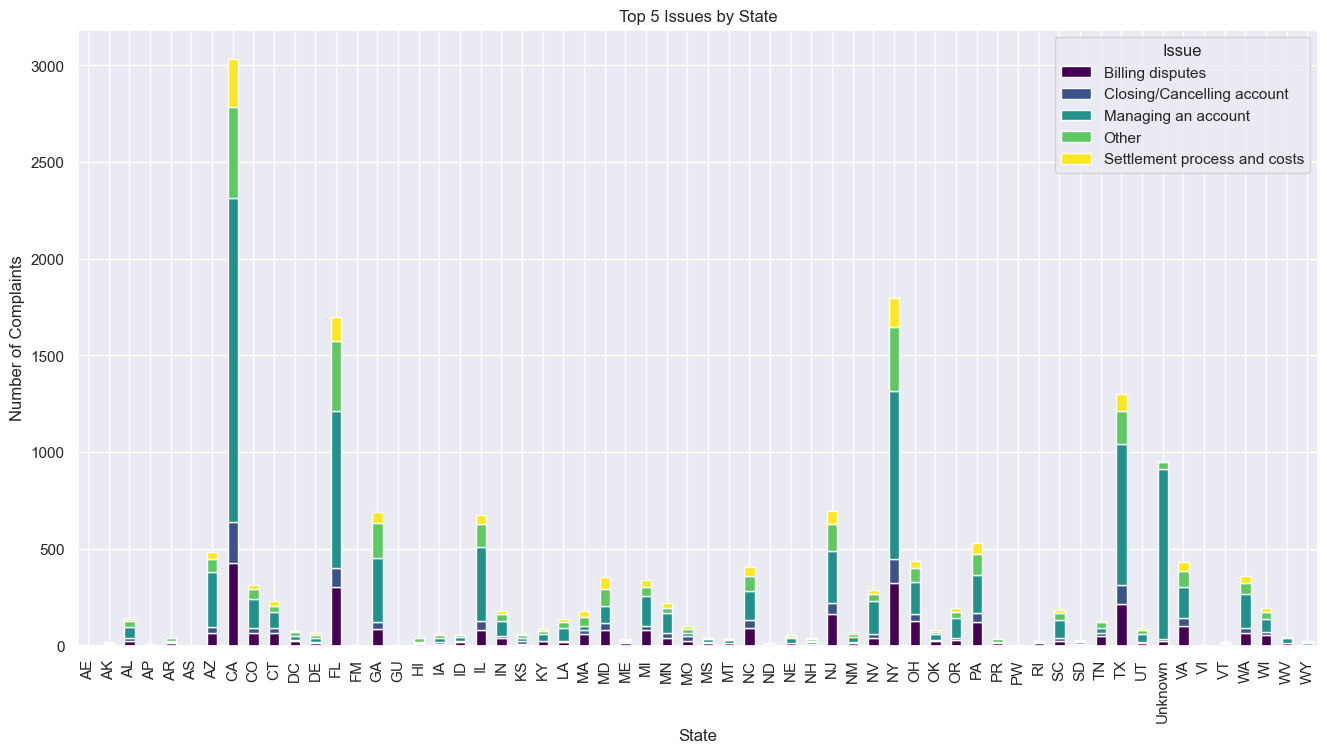

In [9]:
issue_counts = df.groupby(['State', 'Issue']).size().reset_index(name='Complaint Count')

top_5_issues = issue_counts['Issue'].value_counts().head(5).index
filtered_df = issue_counts[issue_counts['Issue'].isin(top_5_issues)]

pivot_df = filtered_df.pivot_table(index='State', columns='Issue', values='Complaint Count', fill_value=0)


pivot_df.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Top 5 Issues by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.legend(title='Issue')
plt.show()

### Company & Consumer

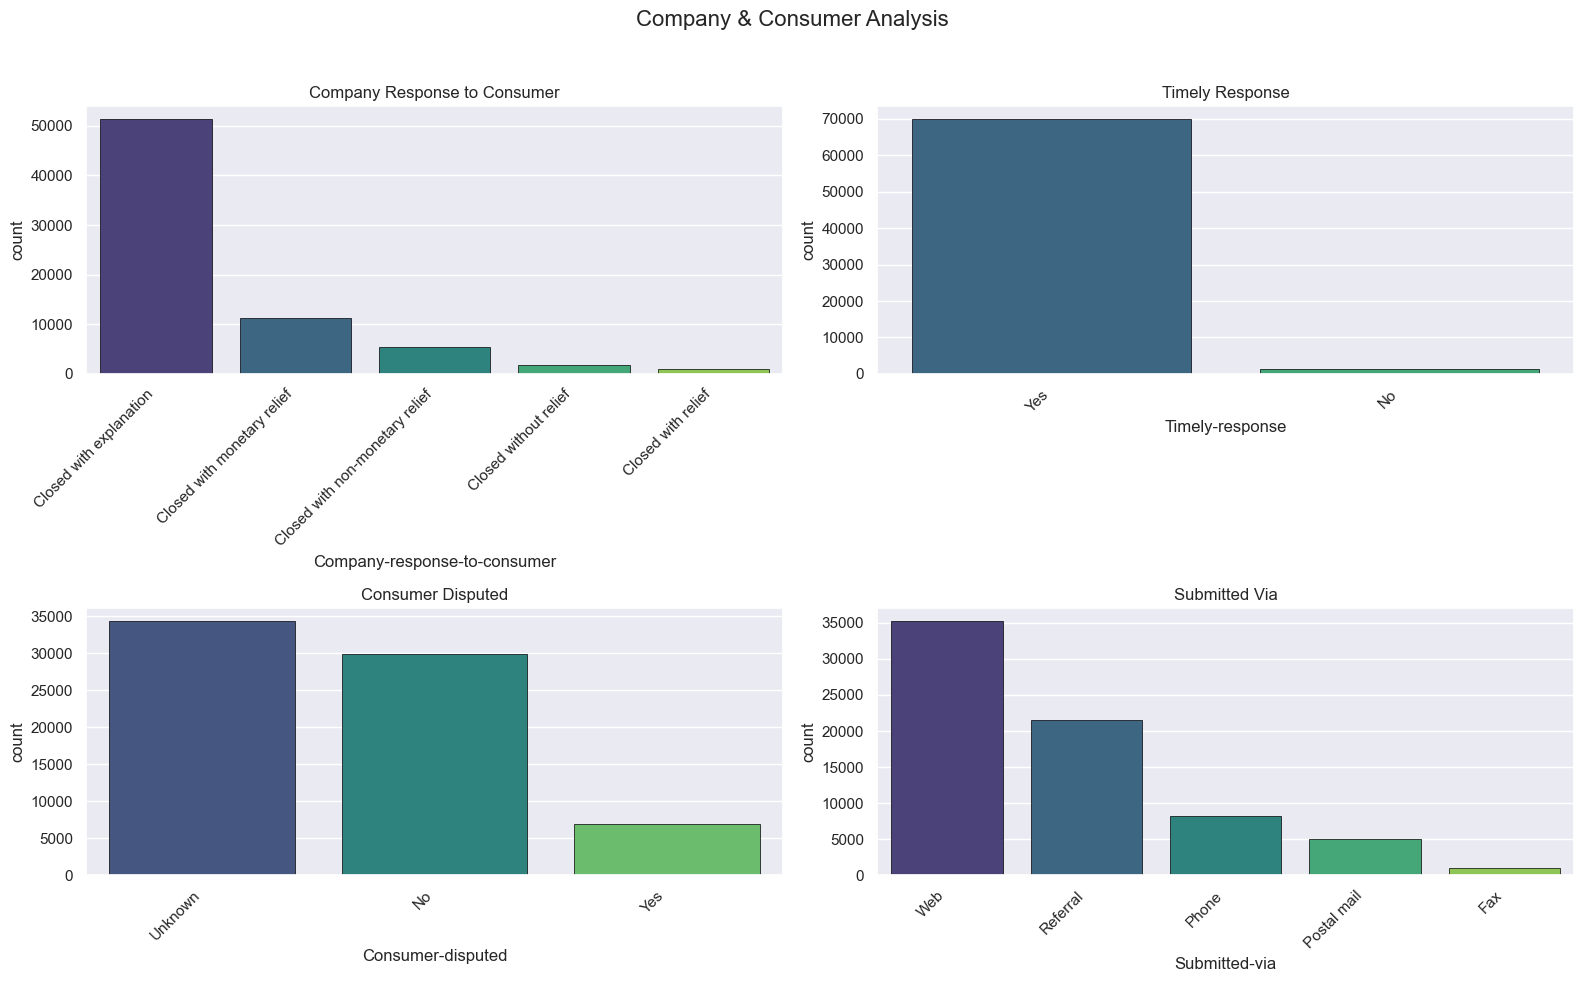

In [10]:
def add_border_to_bars(ax, edgecolor='black', linewidth=0.5):
    for patch in ax.patches:
        patch.set_edgecolor(edgecolor)
        patch.set_linewidth(linewidth)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

n_value = df['Company-response-to-consumer'].value_counts().iloc[:5].index
sns.countplot(data=df[df['Company-response-to-consumer'].isin(n_value)],
              x='Company-response-to-consumer', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_title('Company Response to Consumer')
add_border_to_bars(axes[0, 0])


n_value = df['Timely-response'].value_counts().index
sns.countplot(data=df[df['Timely-response'].isin(n_value)],
              x='Timely-response', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_title('Timely Response')
add_border_to_bars(axes[0, 1])


n_value = df['Consumer-disputed'].value_counts().index
sns.countplot(data=df[df['Consumer-disputed'].isin(n_value)],
              x='Consumer-disputed', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_title('Consumer Disputed')
add_border_to_bars(axes[1, 0])

n_value = df['Submitted-via'].value_counts().index
sns.countplot(data=df[df['Submitted-via'].isin(n_value)],
              x='Submitted-via', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_title('Submitted Via')
add_border_to_bars(axes[1, 1])

plt.suptitle('Company & Consumer Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Time Series

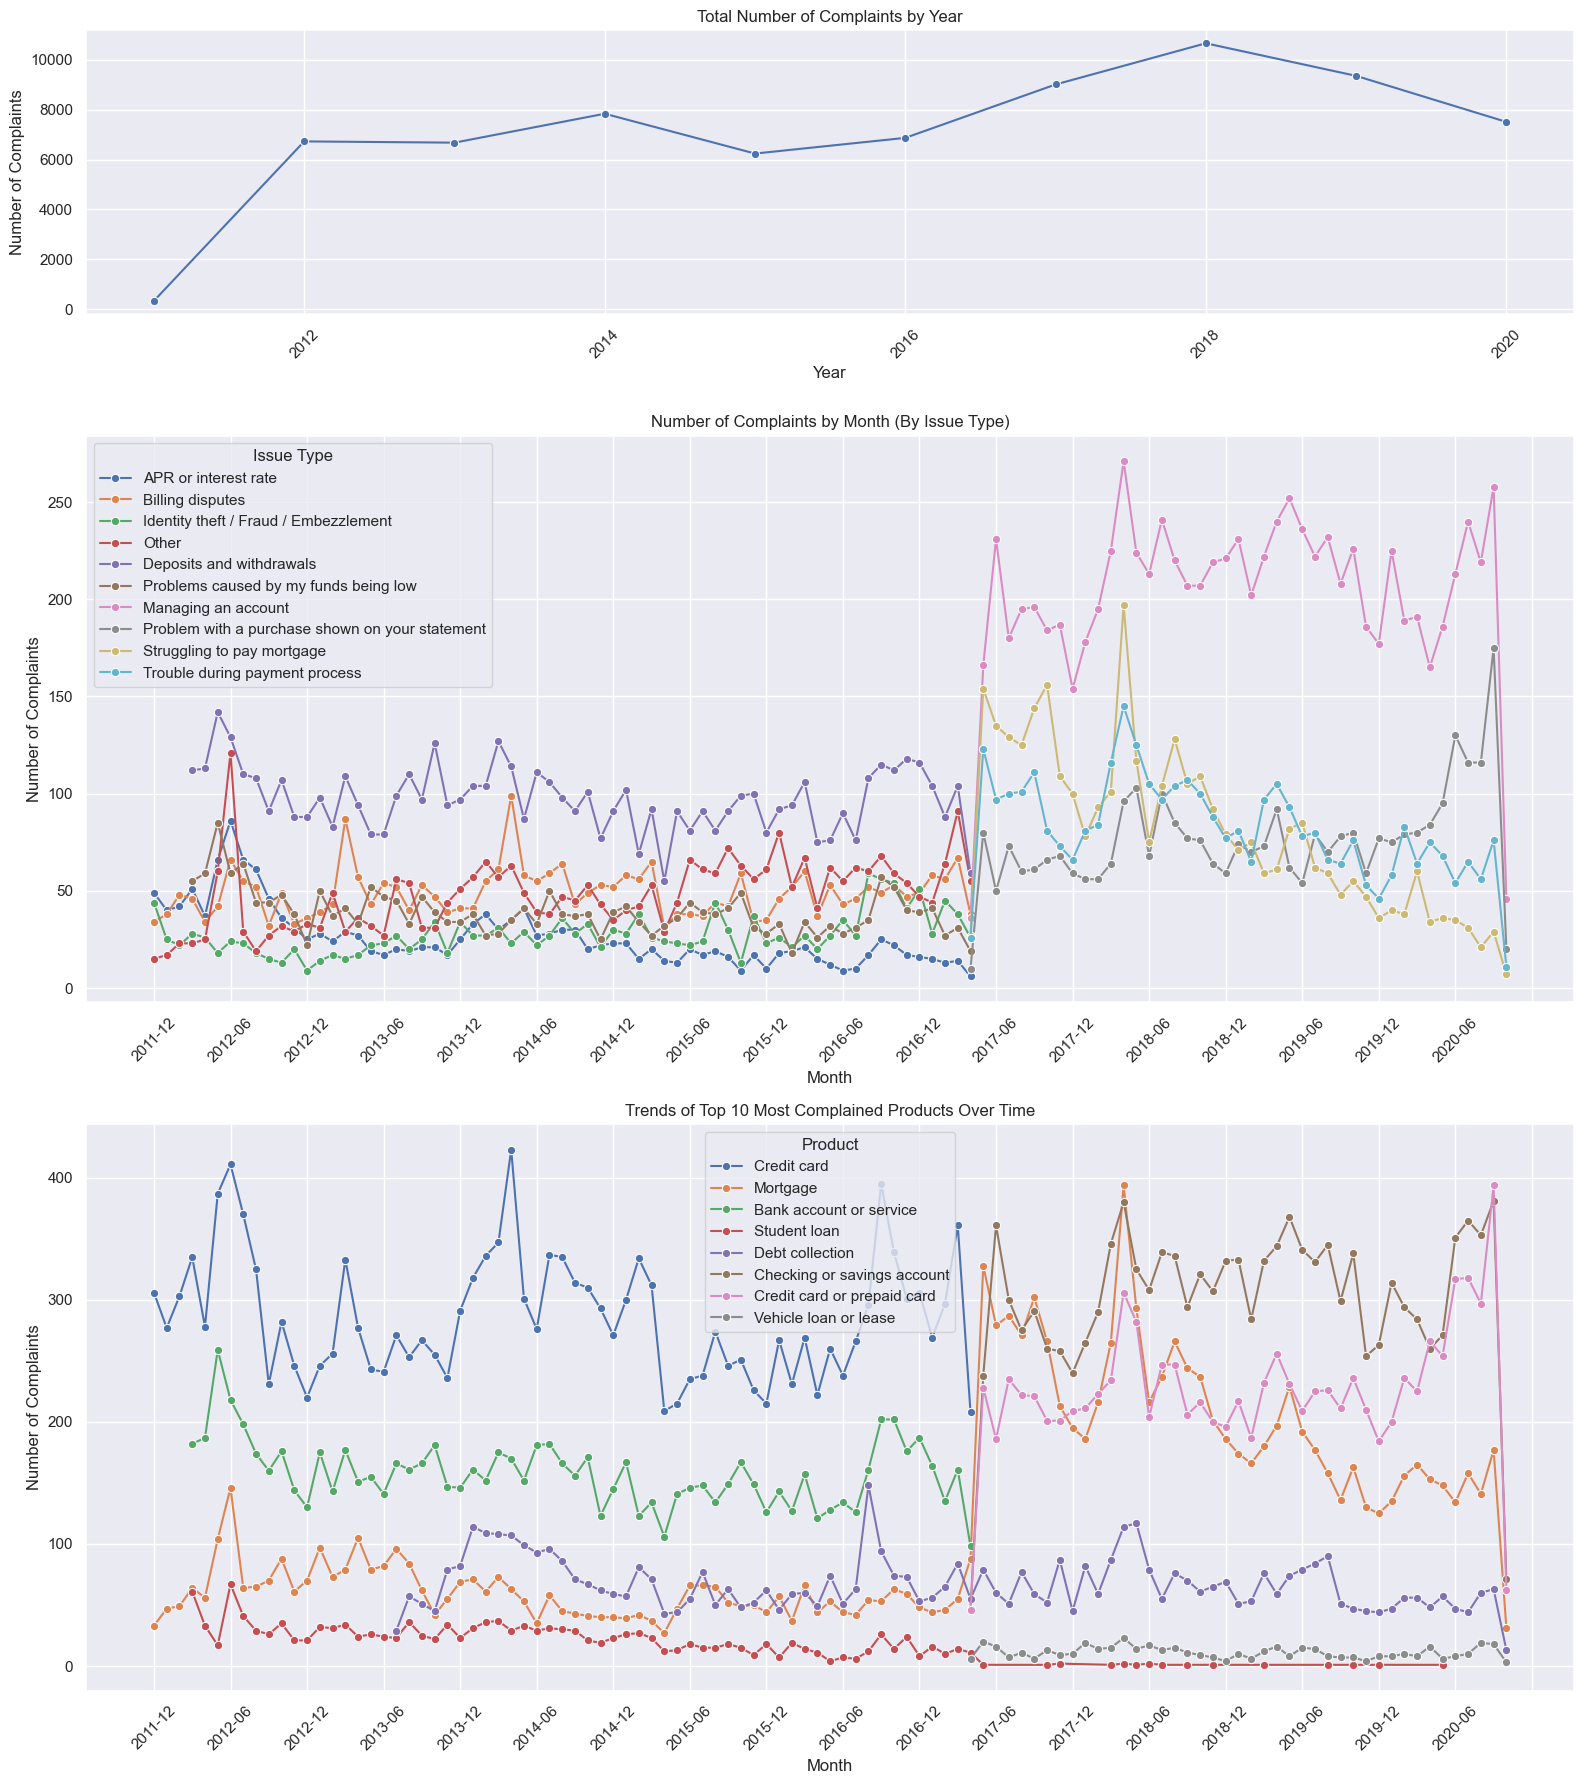

In [11]:
df['Month'] = df['Date-Sumbited'].dt.to_period('M').astype(str)

complaints_per_year = df.groupby(df['Date-Sumbited'].dt.year)['Complaint-ID'].count()

top_issues = df['Issue'].value_counts().nlargest(10).index
filtered_df = df[df['Issue'].isin(top_issues)]
complaints_per_month_issue = filtered_df.groupby(['Month', 'Issue'])['Complaint-ID'].count().reset_index()

top_products = df['Product'].value_counts().nlargest(10).index
top_products_df = df[df['Product'].isin(top_products)]
complaints_per_month_product = top_products_df.groupby(['Month', 'Product'])['Complaint-ID'].count().reset_index()

fig = plt.figure(figsize=(16, 18))
gs = GridSpec(3, 1, height_ratios=[1, 2, 2])  

ax0 = plt.subplot(gs[0])
sns.lineplot(x=complaints_per_year.index, y=complaints_per_year.values, marker='o', ax=ax0)
ax0.set_title('Total Number of Complaints by Year')
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Complaints')
ax0.tick_params(axis='x', rotation=45)
ax0.grid(True)

ax1 = plt.subplot(gs[1])
sns.lineplot(data=complaints_per_month_issue, x='Month', y='Complaint-ID', hue='Issue', marker='o', ax=ax1)
ax1.set_title('Number of Complaints by Month (By Issue Type)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Complaints')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Issue Type')
ax1.grid(True)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))

ax2 = plt.subplot(gs[2])
sns.lineplot(data=complaints_per_month_product, x='Month', y='Complaint-ID', hue='Product', marker='o', ax=ax2)
ax2.set_title('Trends of Top 10 Most Complained Products Over Time')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Complaints')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Product')
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.subplots_adjust(hspace=0.5) 
plt.tight_layout()
plt.show()

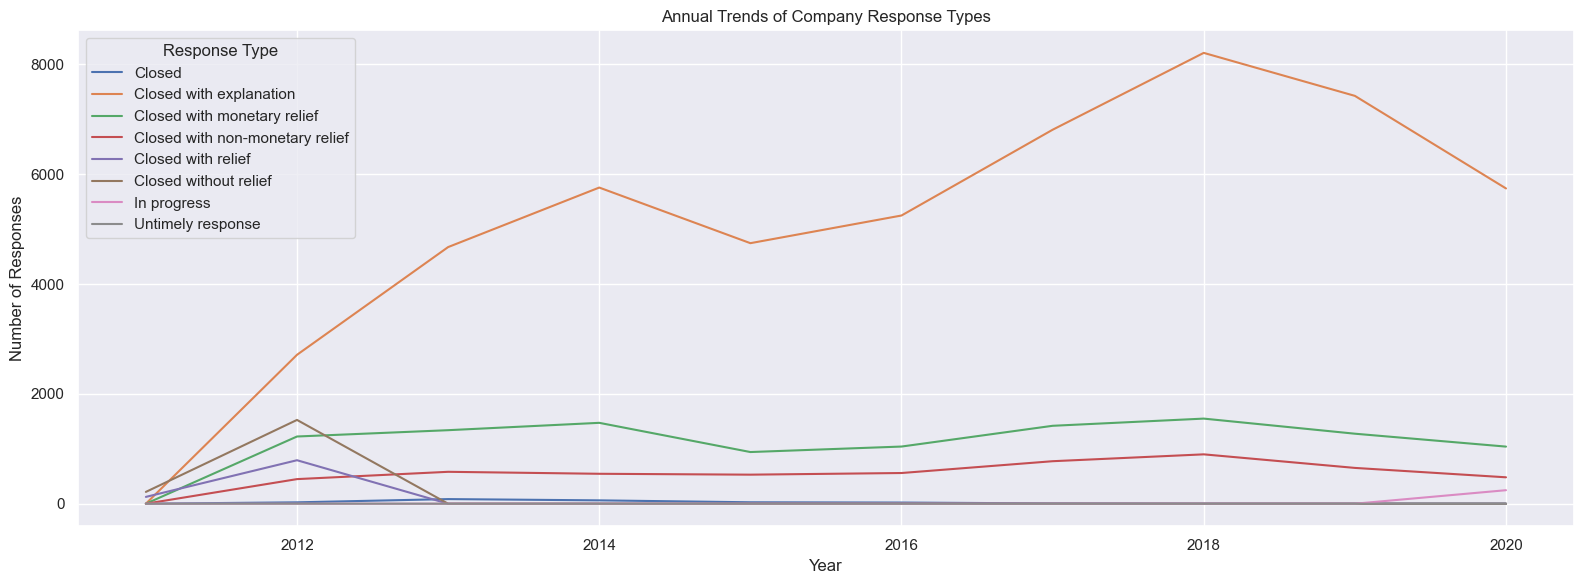

In [12]:
response_trends = df.groupby(['Year', 'Company-response-to-consumer']).size().unstack().fillna(0)
response_trends.plot(kind='line', figsize=(16, 6))
plt.title('Annual Trends of Company Response Types')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Response Type')
plt.tight_layout()
plt.show()


In [13]:
df.to_csv('clean_df.csv')

*We have finished our exploratory data analysis process, now we will look for answers to some business questions*